<a href="https://colab.research.google.com/github/cmtowle/4dstem/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing relevant packages

In [ ]:
!pip install tifffile PyDrive

## Importing the packages

In [ ]:
# Machine Learning / Image related

import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

from collections import defaultdict, Counter

import matplotlib.pylab as plt
import numpy as np
import tifffile
import glob
import scipy
import random

# Navigating files
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
gdrive_folder_to_os_folder = {
    '1LBDez0jomVY80vBEVyfvfcHtdGLlfcI4': 'mos2_001',
    '1Zun1kEOw7WPkWRouU74-AEMHb36uCcLf': 'au_111',
    '1F_iOrTSWq_nJdzlJuV4hfSfmnbu0QlQL': 'au_211'
}

In [ ]:
def authenticate_and_download(folder_map=gdrive_folder_to_os_folder):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  
  for g_folder, os_folder in folder_map.iteritems():
    print 'Google folder id: %s' %g_folder
    os_folder_path = '~/' + os_folder
    print 'OS folder: %s' %os_folder
    local_download_path = os.path.expanduser(os_folder_path)
    try:
      os.makedirs(local_download_path)
    except: pass

    file_list = drive.ListFile(
      {'q': "'%s' in parents"%g_folder}).GetList()
    
    print 'Number of files found: %d' %len(file_list)

    for i, f in enumerate(file_list):
      if (i + 1)%100 == 0:
        print '%dth image reached' %(i+1)
      # 3. Create & download by id.
        print('title: %s, id: %s' % (f['title'], f['id']))
      fname = os.path.join(local_download_path, f['title'])
      if os.path.isfile(fname):
        continue
      if (i + 1)%100 == 0:
        print('downloading to {}'.format(fname))
      f_ = drive.CreateFile({'id': f['id']})
      f_.GetContentFile(fname)

In [ ]:
authenticate_and_download()

Google folder id: 1LBDez0jomVY80vBEVyfvfcHtdGLlfcI4
OS folder: mos2_001
Number of files found: 5574
100th image reached
title: trainingSet3_04974.tif, id: 1yIyko5tvUsCjnbYcKpCqAIAlbH6JpiJP
200th image reached
title: trainingSet3_04875.tif, id: 1Hbsy-EFLtWxupVvm527HKXEALybKu3eS
300th image reached
title: trainingSet3_04775.tif, id: 1dM1i-PL1oP4l9xdfx0m3m9S3ZLSvFUqR
400th image reached
title: trainingSet3_04676.tif, id: 10TCcOAVO1dzvd2dZWmhD06UajNH-C27p
500th image reached
title: trainingSet3_04574.tif, id: 1r1zA107X1QUC81B-ORM1wzTTVUdsq-_8
600th image reached
title: trainingSet3_04474.tif, id: 1NUKINqYTjxwt59LsY_TrGdOlnjw4y7tP
700th image reached
title: trainingSet3_04375.tif, id: 1DFg-4BROOoCa6cTi15JZ3XwtADAtIDnl
800th image reached
title: trainingSet3_04274.tif, id: 1hcbHNkFMAPgeGtznCnc8Wo_PCqHov-tX
900th image reached
title: trainingSet3_04175.tif, id: 13V0-S4_0PX4e9K6TRo7mM00xBW84tFIe
1000th image reached
title: trainingSet3_04077.tif, id: 1Ql6aThYsf3yE9eb7RUCYSoYoW9Zl8MdU
1100th im

ApiRequestError: ignored

In [ ]:
class_label_to_os_folder = {
    0: 'mos2_001',
    1: 'au_111',
    2: 'au_211'
}

In [ ]:
def get_training_data():
  X, y = [], []
  for class_label, os_folder in class_label_to_os_folder.iteritems():
    print 'Class %d: %s' %(class_label, os_folder)
    for i, fp in enumerate(glob.glob('/root/%s/*.tif' %os_folder)):
      if (i + 1)%100 == 0:
        print '%dth image read' %(i+1)
      with tifffile.TiffFile(fp) as tif:
        data = tif.asarray()
    #     data = scipy.ndimage.zoom(data, zoom=0.25)
        X.append(data)
        y.append(class_label)
  return X, y

In [ ]:
X, y = get_training_data()
assert len(X) == len(y)
print 'Number of images: %d' %len(X)
print 'Distribution of labels: '
print Counter(y)

In [ ]:
x_train = X_train
x_test = X_test

In [ ]:
batch_size = 40
num_classes = 2
epochs = 20

In [ ]:
img_x, img_y = 128, 128

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train.shape

(800, 128, 128, 1)

In [ ]:
x_train = X_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [ ]:
np.array([1,2])/2.0

array([0.5, 1. ])

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (800, 128, 128, 1))
(800, 'train samples')
(200, 'test samples')


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

256.93726
0


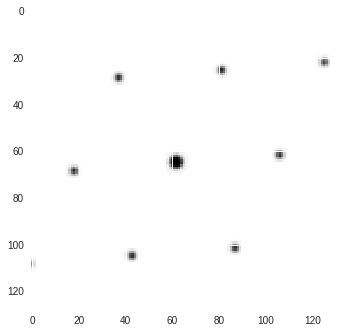

In [ ]:
print np.max(x_train[-1])
print np.sum(x_train[-1, 0, :, 0] > 0)
plt.imshow(x_train[-1, :, :, 0])

248.4196
12


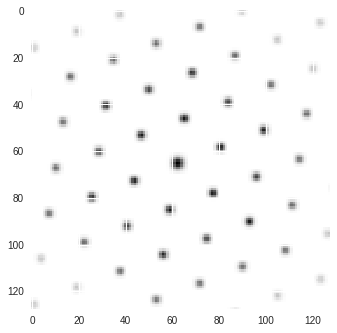

In [ ]:
print np.max(x_train[0])
print np.sum(x_train[0, 0, :, 0] > 0)
plt.imshow(x_train[0, :, :, 0])

In [ ]:
input_shape

(128, 128, 1)

In [ ]:
print X.shape
plt.imshow(X[0, :, :])

(1000, 16384)


IndexError: ignored

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(262144,)))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = AccuracyHistory()

model.fit(X, y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.1,
          shuffle=True,
          callbacks=[history])

Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 5s 6ms/step - loss: 7.1166 - acc: 0.5544 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/20
900/900 [==============================] - 3s 3ms/step - loss: 7.1099 - acc: 0.5589 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/20
900/900 [==============================] - 3s 3ms/step - loss: 7.1457 - acc: 0.5567 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/20
900/900 [==============================] - 3s 3ms/step - loss: 7.1457 - acc: 0.5567 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/20
900/900 [==============================] - 3s 3ms/step - loss: 7.1457 - acc: 0.5567 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/20
900/900 [==============================] - 3s 3ms/step - loss: 7.1457 - acc: 0.5567 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/20
900/900 [==============================] - 3s 3ms/step - loss: 7.1457 - acc: 0.5567 - val_loss: 16.1181 - val_acc: 0.0000

In [ ]:
x_train_mlp = x_train.reshape(x_train.shape[0], img_x*img_y)
print x_train_mlp.shape

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(16384,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = AccuracyHistory()

model.fit(x_train_mlp, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2,
          shuffle=True,
          callbacks=[history])

(800, 16384)
Train on 640 samples, validate on 160 samples
Epoch 1/50
640/640 [==============================] - 1s 1ms/step - loss: 1.1521 - acc: 0.9141 - val_loss: 0.2057 - val_acc: 0.9875
Epoch 2/50
640/640 [==============================] - 0s 456us/step - loss: 0.3728 - acc: 0.9766 - val_loss: 0.1007 - val_acc: 0.9938
Epoch 3/50
640/640 [==============================] - 0s 422us/step - loss: 0.7815 - acc: 0.9469 - val_loss: 1.9050 - val_acc: 0.8750
Epoch 4/50
640/640 [==============================] - 0s 451us/step - loss: 0.2848 - acc: 0.9812 - val_loss: 0.3022 - val_acc: 0.9812
Epoch 5/50
640/640 [==============================] - 0s 435us/step - loss: 1.0074 - acc: 0.9375 - val_loss: 0.1007 - val_acc: 0.9938
Epoch 6/50
640/640 [==============================] - 0s 401us/step - loss: 0.4314 - acc: 0.9719 - val_loss: 0.5037 - val_acc: 0.9688
Epoch 7/50
640/640 [==============================] - 0s 413us/step - loss: 0.1259 - acc: 0.9922 - val_loss: 0.5505 - val_acc: 0.9625
Epoch

[1. 0.]


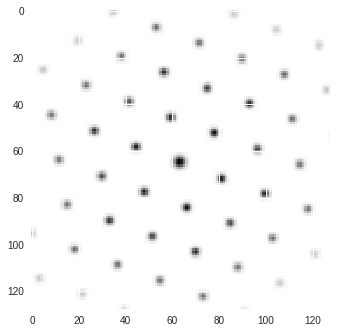

In [ ]:
plt.imshow(x_test[0, :, :, 0])
  print y_test[0]

In [ ]:
model.evaluate(x_test.reshape(x_test.shape[0], 16384), y_test)

200/200 [==============================] - 0s 191us/step


[0.48354297637940136, 0.97]

80


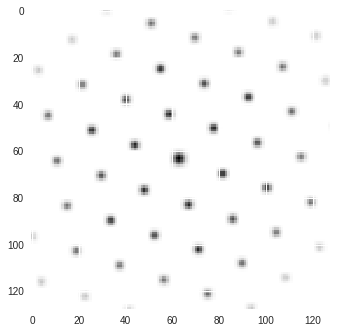

In [ ]:
i = random.randint(0, len(x_test)-1)
print i
plt.imshow(x_test[i, :, :, 0])

In [ ]:
int(model.predict(x_test[i, :, :, 0].reshape(1, 16384))[0][1] == 1)

0

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(25, 25), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [ ]:
history = AccuracyHistory()

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2,
          shuffle=True,
          callbacks=[history])

Train on 800 samples, validate on 800 samples
Epoch 1/10
800/800 [==============================] - 11s 14ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
800/800 [==============================] - 11s 14ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
800/800 [==============================] - 11s 14ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
800/800 [==============================] - 11s 14ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
578/800 [====================>.........] - ETA: 2s - loss: 7.8638 - acc: 0.5121

KeyboardInterrupt: ignored

('Test loss:', 8.059047756195076)
('Test accuracy:', 0.5)


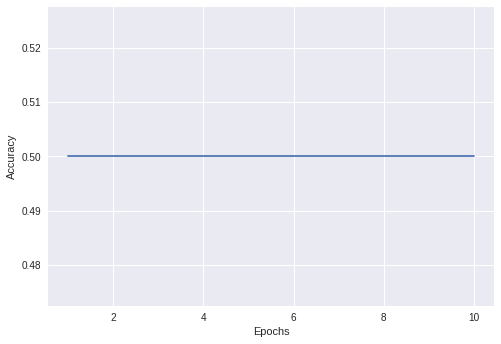

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
!ls /root/

data  data2  data3


In [ ]:
class1_data = []
for fp in glob.glob('/root/data/*.tif'):
  print fp
  with tifffile.TiffFile(fp) as tif:
    data = tif.asarray()
#     data = scipy.ndimage.zoom(data, zoom=0.25)
    class1_data.append(data)

/root/data/trainingSet2_0243.tif
/root/data/trainingSet2_0461.tif
/root/data/trainingSet2_0436.tif
/root/data/trainingSet2_0154.tif
/root/data/trainingSet2_0397.tif
/root/data/trainingSet2_0419.tif
/root/data/trainingSet2_0113.tif
/root/data/trainingSet2_0254.tif
/root/data/trainingSet2_0139.tif
/root/data/trainingSet2_0019.tif
/root/data/trainingSet2_0382.tif
/root/data/trainingSet2_0400.tif
/root/data/trainingSet2_0219.tif
/root/data/trainingSet2_0157.tif
/root/data/trainingSet2_0185.tif
/root/data/trainingSet2_0443.tif
/root/data/trainingSet2_0066.tif
/root/data/trainingSet2_0304.tif
/root/data/trainingSet2_0318.tif
/root/data/trainingSet2_0026.tif
/root/data/trainingSet2_0500.tif
/root/data/trainingSet2_0060.tif
/root/data/trainingSet2_0125.tif
/root/data/trainingSet2_0294.tif
/root/data/trainingSet2_0073.tif
/root/data/trainingSet2_0448.tif
/root/data/trainingSet2_0438.tif
/root/data/trainingSet2_0259.tif
/root/data/trainingSet2_0161.tif
/root/data/trainingSet2_0367.tif
/root/data

In [ ]:
len(class1_data)

500

In [ ]:
class3_data = []
for fp in glob.glob('/root/data3/*.tif'):
  print fp
  with tifffile.TiffFile(fp) as tif:
    data = tif.asarray()
#     data = scipy.ndimage.zoom(data, zoom=0.25)
    class3_data.append(data)

/root/data3/trainingSetAu211_0112.tif
/root/data3/trainingSetAu211_0388.tif
/root/data3/trainingSetAu211_0326.tif
/root/data3/trainingSetAu211_0271.tif
/root/data3/trainingSetAu211_0354.tif
/root/data3/trainingSetAu211_0002.tif
/root/data3/trainingSetAu211_0121.tif
/root/data3/trainingSetAu211_0327.tif
/root/data3/trainingSetAu211_0458.tif
/root/data3/trainingSetAu211_0384.tif
/root/data3/trainingSetAu211_0239.tif
/root/data3/trainingSetAu211_0340.tif
/root/data3/trainingSetAu211_0087.tif
/root/data3/trainingSetAu211_0308.tif
/root/data3/trainingSetAu211_0316.tif
/root/data3/trainingSetAu211_0280.tif
/root/data3/trainingSetAu211_0140.tif
/root/data3/trainingSetAu211_0338.tif
/root/data3/trainingSetAu211_0364.tif
/root/data3/trainingSetAu211_0094.tif
/root/data3/trainingSetAu211_0324.tif
/root/data3/trainingSetAu211_0312.tif
/root/data3/trainingSetAu211_0021.tif
/root/data3/trainingSetAu211_0166.tif
/root/data3/trainingSetAu211_0429.tif
/root/data3/trainingSetAu211_0214.tif
/root/data3/

In [ ]:
class2_data = []
for fp in glob.glob('/root/data2/*.tif'):
  print fp
  with tifffile.TiffFile(fp) as tif:
    data = tif.asarray()
#     data = scipy.ndimage.zoom(data, zoom=0.25)
    class2_data.append(data)

/root/data2/trainingSetAu111_0092.tif
/root/data2/trainingSetAu111_0086.tif
/root/data2/trainingSetAu111_0097.tif
/root/data2/trainingSetAu111_0402.tif
/root/data2/trainingSetAu111_0236.tif
/root/data2/trainingSetAu111_0486.tif
/root/data2/trainingSetAu111_0267.tif
/root/data2/trainingSetAu111_0143.tif
/root/data2/trainingSetAu111_0091.tif
/root/data2/trainingSetAu111_0041.tif
/root/data2/trainingSetAu111_0428.tif
/root/data2/trainingSetAu111_0233.tif
/root/data2/trainingSetAu111_0048.tif
/root/data2/trainingSetAu111_0487.tif
/root/data2/trainingSetAu111_0247.tif
/root/data2/trainingSetAu111_0178.tif
/root/data2/trainingSetAu111_0469.tif
/root/data2/trainingSetAu111_0046.tif
/root/data2/trainingSetAu111_0030.tif
/root/data2/trainingSetAu111_0179.tif
/root/data2/trainingSetAu111_0373.tif
/root/data2/trainingSetAu111_0167.tif
/root/data2/trainingSetAu111_0424.tif
/root/data2/trainingSetAu111_0304.tif
/root/data2/trainingSetAu111_0026.tif
/root/data2/trainingSetAu111_0319.tif
/root/data2/

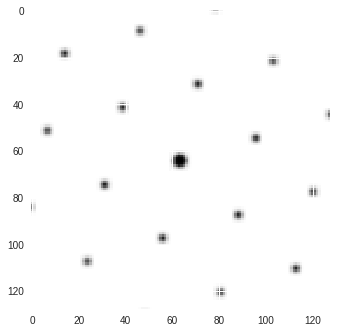

In [ ]:
len(class1_data), len(class2_data)
plt.imshow(class2_data[0])

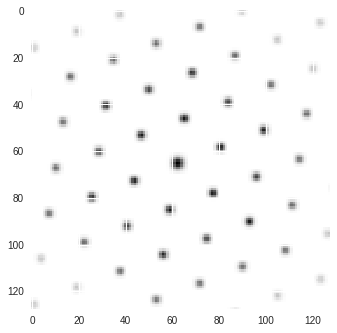

In [ ]:
plt.imshow(class1_data[0])

In [ ]:
X = class1_data + class2_data
Y = [0]*500 + [1]*500
assert len(X) == len(Y)

In [ ]:
X_numpy = np.array(X)

In [ ]:
import numpy as np

In [ ]:
X_numpy.shape

(1000, 512, 512)

In [ ]:
X_train = class1_data[:400] + class2_data[:400]
y_train = [0]*400 + [1]*400
assert len(X_train) == len(y_train)

X_test = class1_data[400:] + class2_data[400:]
y_test = [0]*100 + [1]*100
assert len(X_test) == len(y_test)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(800, 128, 128)

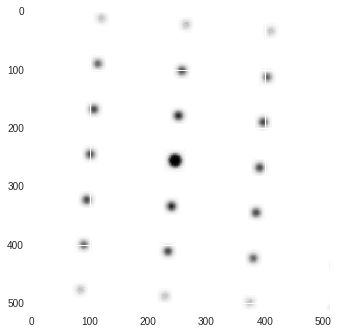

In [ ]:
plt.imshow(class3_data[0])

In [ ]:
X = np.array(class1_data + class3_data)
y = np.array([0]*500 + [1]*500)
y = keras.utils.to_categorical(y, num_classes)

X = X.reshape(X.shape[0], 262144)
X/=255
X.shape

(1000, 262144)

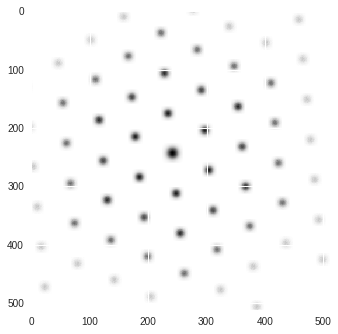

In [ ]:
plt.imshow(class1_data[-1])